In [1]:



import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


df = pd.read_csv('./london_weather.csv')
# df.info()
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)
# df.info()

print(df.tail())
df=df[["date","mean_temp"]]
df=df[-2000:]
print(df.tail())
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
print(df.tail())

df.sort_values(by='date', inplace = True)
df.reset_index(drop=True, inplace=True)
print(df.head())

df.columns = ['ds','y']
print(df.tail())
df.set_index('ds', inplace= True)
print(df.head())

#df.plot(x='df.index',y='y',figsize=(18,6))

print(len(df))






           date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
13838  20191227          8.0       0.0              12.0       9.6        7.5   
13839  20191228          8.0       0.0              12.0       9.9        8.1   
13840  20191229          6.0       2.2              29.0      11.5        8.7   
13841  20191230          0.0       3.6              37.0       9.3        6.5   
13842  20191231          7.0       0.0              13.0       9.4        7.1   

       min_temp  precipitation  pressure  snow_depth  
13838       6.6            0.0  102880.0         0.0  
13839       6.6            0.0  103630.0         0.0  
13840       7.4            0.0  103360.0         0.0  
13841       1.5            0.0  102970.0         0.0  
13842       4.9            0.0  103160.0         0.0  
           date  mean_temp
13838  20191227        7.5
13839  20191228        8.1
13840  20191229        8.7
13841  20191230        6.5
13842  20191231        7.1
                     

In [2]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df['y'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=10.14 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=11042.551, Time=0.17 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=9014.676, Time=2.87 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=9558.742, Time=2.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=11041.119, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=9551.667, Time=0.39 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=8835.742, Time=7.95 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=23.58 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=10.66 sec


KeyboardInterrupt: 

In [3]:
#Fit ARIMA Model to AirPassengers dataset
from statsmodels.tsa.arima.model import ARIMA


In [4]:
# Split data into train / test sets
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:] # set one year(12 months) for testing
  
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = ARIMA(train['y'], 
                order = (2, 0, 2), 
                seasonal_order =(2, 1, 0, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1635
Model:             ARIMA(2, 0, 2)x(2, 1, [], 12)   Log Likelihood               -3600.243
Date:                           Sun, 19 Mar 2023   AIC                           7214.486
Time:                                   18:30:45   BIC                           7252.230
Sample:                                        0   HQIC                          7228.491
                                          - 1635                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5859      0.045     34.875      0.000       1.497       1.675
ar.L2         -0.5931      0.043    -13.889      0.000      -0.677      -0.509
ma.L1         -0.7573      0.049    -15.329      0.000      -0.854      -0.661
ma.L2         -0.1649      0.034     -4.921      0.000      -0.231      -0.099
ar.S.L12      -0.6669      0.025    -26.666      0.000      -0.716      -0.618
ar.S.L24      -0.3160      0.024    -13.097      0.000      -0.363      -0.269
sigma2         4.9256      0.173     28.543      0.000       4.587       5.264
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.10
Prob(Q):                              0.98   Prob(JB):                         0.13
Heteroskedasticity (H):               1.21   Skew:                            -0.12
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='ds'>

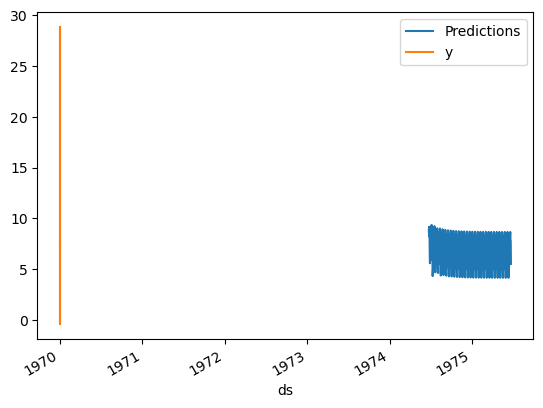

In [5]:
#Predictions of ARIMA Model against the test set
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['y'].plot(legend = True)

In [6]:
start

1635

In [7]:
#Evaluate the model using MSE and RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
RMSE=rmse(test["y"], predictions)
  
# Calculate mean squared error
ERROR=mean_squared_error(test["y"], predictions)

In [8]:
ERROR

62.36341360703283

In [9]:
RMSE

7.8970509436771925

<Axes: xlabel='ds'>

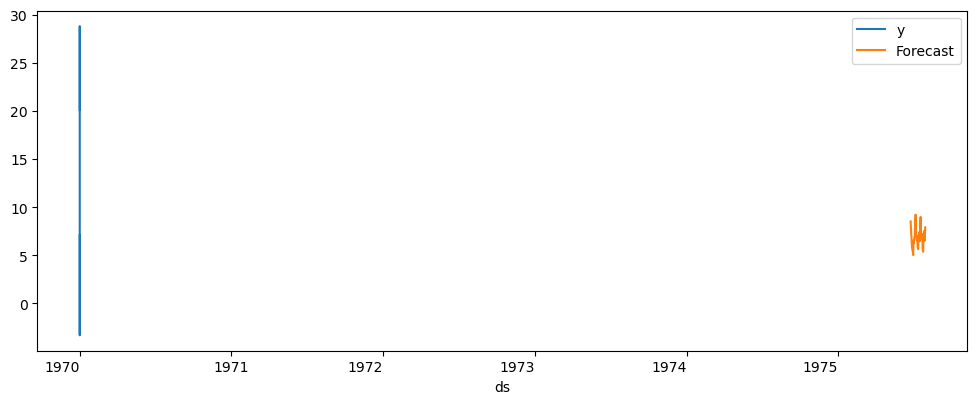

In [10]:
#Forecast using ARIMA Model


# Train the model on the full dataset
model = model = ARIMA(df['y'], 
                        order = (2, 0, 2), 
                        seasonal_order =(2, 1, 0, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df['y'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

In [11]:
forecast

2000    8.520677
2001    7.514792
2002    6.867532
2003    5.927376
2004    5.580999
2005    5.461112
2006    5.030435
2007    6.553704
2008    6.301833
2009    6.876175
2010    6.884654
2011    8.562038
2012    9.225862
2013    7.555027
2014    6.884445
2015    6.572339
2016    6.732282
2017    5.812408
2018    5.643582
2019    7.062641
2020    6.933949
2021    7.431328
2022    6.476134
2023    8.301960
2024    8.986229
2025    7.411396
2026    7.224100
2027    6.731082
2028    7.211863
2029    5.550012
2030    5.378286
2031    6.925973
2032    6.990598
2033    7.549670
2034    6.531949
2035    7.913460
Name: Forecast, dtype: float64

In [12]:
df['y']

ds
1970-01-01 00:00:00.020140703    20.1
1970-01-01 00:00:00.020140704    20.5
1970-01-01 00:00:00.020140705    19.2
1970-01-01 00:00:00.020140706    17.9
1970-01-01 00:00:00.020140707    16.4
                                 ... 
1970-01-01 00:00:00.020191227     7.5
1970-01-01 00:00:00.020191228     8.1
1970-01-01 00:00:00.020191229     8.7
1970-01-01 00:00:00.020191230     6.5
1970-01-01 00:00:00.020191231     7.1
Name: y, Length: 2000, dtype: float64